In [5]:
# import thu vien
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import numpy as np

In [52]:
# SVM
# Random forest
# desion tree
# knn
# logicstic regression
# neural network

In [2]:
# khai bao label flowers
flowers = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

In [3]:
# khai bao folder path
folder_path = 'D:\\HKI NAM 4\\HOC MAY\\CUOIKI\\UNG DUNG CAU 2\\flowers\\'

# **Chuẩn hóa dữ liệu**

In [14]:
# feature vector được lấy từ hình ảnh hoa
# MobileNet được xử dụng để lấy feature vector (vector đặc trưng) của hình ảnh trong tập dữ liệu

# load MobileNet trước khi train
model = MobileNet(input_shape=(224,224,3), include_top=True)
# output của reshape_2 là vector 1000 phần tử
vector = model.get_layer("reshape_2").output
# tạo feature extractor
feature_extractor = tf.keras.Model(model.input, vector)

# tạo list chứa vector của hình ảnh
X_list = []
# tạo list chứa nhãn của hình ảnh
Y_list = []

for folder in os.listdir(folder_path):
    # Lấy nhãn từ tên folder
    if folder == 'daisy':
        label = 0
    elif folder == 'dandelion':
        label = 1
    elif folder == 'rose':
        label = 2
    elif folder == 'sunflower':
        label = 3
    elif folder == 'tulip':
        label = 4
    
    for file in os.listdir(os.path.join(folder_path, folder)):
        file_path = folder_path + folder +'\\'+ file
        # chỉ đọc file jpg
        if file.endswith("jpg"):
            # load hình ảnh
            img = image.load_img(file_path, target_size=(224,224))
            # convert hình ảnh thành numpy array
            img_arr = image.img_to_array(img)
            # Thêm 1 dimension
            img_arr_b = np.expand_dims(img_arr, axis=0)
            # tiền xử lý ảnh
            input_img = preprocess_input(img_arr_b)
            # extract feature
            feature_vec = feature_extractor.predict(input_img)

            # thêm vào list
            X_list.append(feature_vec.ravel())
            Y_list.append(label)
        else:
            continue

In [24]:
# chuyển thành numpy array
X = np.asarray(X_list, dtype=np.float32)
Y = np.asarray(Y_list, dtype=np.float32)

# trộn mảng
for i in range(100):
    X, Y = shuffle(X, Y)

In [25]:
# tách train, test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    stratify=Y,
                                                    random_state=0)

# **Model 1: SVM**

**Training Model**

In [26]:
# SVM model
svm_lin = svm.SVC(C=1.0, kernel="linear")
svm_model = svm_lin.fit(X_train, Y_train)


**Đánh giá độ chính xác**

In [27]:
y_pred_svm = svm_model.predict(X_test)
print(classification_report(Y_test, y_pred_svm,
                            target_names=flowers))

              precision    recall  f1-score   support

       daisy       0.85      0.87      0.86       153
   dandelion       0.89      0.90      0.90       210
        rose       0.80      0.85      0.82       157
   sunflower       0.93      0.88      0.90       147
       tulip       0.85      0.83      0.84       197

    accuracy                           0.86       864
   macro avg       0.87      0.86      0.86       864
weighted avg       0.87      0.86      0.86       864



# **Model 2: Random Forest**

**Training Model**

In [28]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
RF = RandomForestClassifier(n_estimators=500)
RF_model = RF.fit(X_train, Y_train)


**Đánh giá độ chính xác**

In [29]:
y_pred_RF = RF_model.predict(X_test)
print(classification_report(Y_test,y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       153
         1.0       0.87      0.94      0.90       210
         2.0       0.79      0.85      0.82       157
         3.0       0.91      0.80      0.85       147
         4.0       0.83      0.87      0.85       197

    accuracy                           0.87       864
   macro avg       0.87      0.86      0.86       864
weighted avg       0.87      0.87      0.87       864



# **Model 3: Decision Tree**

**Training Model**

In [30]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
decisiontree_model = decisiontree.fit(X_train, Y_train)

**Đánh giá độ chính xác**

In [31]:
y_pred_DT = decisiontree_model.predict(X_test)
print(classification_report(Y_test, y_pred_DT))

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72       153
         1.0       0.76      0.82      0.79       210
         2.0       0.57      0.63      0.60       157
         3.0       0.54      0.63      0.58       147
         4.0       0.73      0.58      0.65       197

    accuracy                           0.68       864
   macro avg       0.68      0.67      0.67       864
weighted avg       0.68      0.68      0.68       864



# **Model 4: KNN**

**Training Model**

In [32]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
KNN = KNeighborsClassifier(n_neighbors= 100)
KNN_model = KNN.fit(X_train, Y_train)


**Đánh giá độ chính xác**

In [33]:
y_pred_KNN = KNN_model.predict(X_test)
print(classification_report(Y_test, y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       153
         1.0       0.89      0.91      0.90       210
         2.0       0.79      0.80      0.79       157
         3.0       0.78      0.87      0.82       147
         4.0       0.92      0.74      0.82       197

    accuracy                           0.84       864
   macro avg       0.83      0.84      0.83       864
weighted avg       0.84      0.84      0.84       864



# **Model 5: LogisticRegression**

**Training Model**

In [34]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR_model = LR.fit(X_train,Y_train)


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Đánh giá độ chính xác**

In [35]:
y_pred_LR = LR_model.predict(X_test)
print(classification_report(Y_test, y_pred_LR))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       153
         1.0       0.91      0.90      0.91       210
         2.0       0.83      0.83      0.83       157
         3.0       0.88      0.86      0.87       147
         4.0       0.84      0.86      0.85       197

    accuracy                           0.87       864
   macro avg       0.87      0.87      0.87       864
weighted avg       0.87      0.87      0.87       864



# **Model 6: Neural Network**

**chuẩn hóa dữ liệu cho neural network**

In [39]:
n_encoder = OneHotEncoder(sparse=False)

# fit encoder to Y_train
n_encoder.fit(Y_train.reshape(-1,1))
# transform Y_train
e_train_Y = n_encoder.transform(Y_train.reshape(-1,1))
# transform Y_test
e_test_Y = n_encoder.transform(Y_test.reshape(-1,1))

**Training Model**

In [50]:
# Neural model
NR_model = Sequential()
NR_model.add(Dense(256, input_dim=1000, activation="relu"))
NR_model.add(Dropout(0.3))
NR_model.add(Dense(5, kernel_regularizer=l2(0.1), activation="linear"))
NR_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                loss="categorical_hinge", metrics=['accuracy'])

epoch = 100
NR_model.fit(X_train, e_train_Y,
                    validation_split = 0.15,
                    epochs=epoch, batch_size=64, verbose=1)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
46/46 [==============================] - 1s 11ms/step - loss: 3.4816 - accuracy: 0.5101 - val_loss: 1.9599 - val_accuracy: 0.7355
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 2.0537 - accuracy: 0.7411 - val_loss: 1.6854 - val_accuracy: 0.7780
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 1.7151 - accuracy: 0.7942 - val_loss: 1.5927 - val_accuracy: 0.8147
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 1.5245 - accuracy: 0.8303 - val_loss: 1.5370 - val_accuracy: 0.8185
Epoch 5/100
46/46 [==============================] - 0s 7ms/step - loss: 1.4219 - accuracy: 0.8446 - val_loss: 1.4793 - val_accuracy: 0.8263
Epoch 6/100
46/46 [==============================] - 0s 7ms/step - loss: 1.3116 - accuracy: 0.8692 - val_loss: 1.4254 - val_accuracy: 0.8359
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 1.2347 - accuracy: 0.8818 - val_loss: 1.3794 - val_accuracy: 0.8417
Epoch 8/100


**Đánh giá độ chính xác**

In [41]:
y_pred_NN = np.argmax(NR_model.predict(X_test), axis=-1)
print(classification_report(Y_test, y_pred_NN,
                            target_names=flowers))

              precision    recall  f1-score   support

       daisy       0.93      0.88      0.90       153
   dandelion       0.92      0.93      0.92       210
        rose       0.89      0.89      0.89       157
   sunflower       0.90      0.89      0.90       147
       tulip       0.87      0.90      0.88       197

    accuracy                           0.90       864
   macro avg       0.90      0.90      0.90       864
weighted avg       0.90      0.90      0.90       864



# **Dự đoán tên hoa sau khi đưa vào input_image**

**Chuẩn hóa ảnh để dự đoán**

In [48]:
def transform_pic(path):
    # load hình ảnh
    imgT = image.load_img(path, target_size=(224,224))
    # convert hình ảnh thành numpy array
    img_arrT = image.img_to_array(imgT)
    # thêm 1 dimension
    img_arr_bT = np.expand_dims(img_arrT, axis=0)
    # tiền xử lý ảnh
    input_imgT = preprocess_input(img_arr_bT)
    # extract feature
    feature_vecT = feature_extractor.predict(input_imgT)

    return_input = np.asarray([feature_vecT.ravel()], dtype=np.float32)
    return return_input

**Dự đoán tên hoa theo nhãn**

In [43]:

def name_flower(x):
    x = np.uint32(x[0]).item()
    if x == 0 or x == 0.:
        return "Daisy"
    elif x == 1 or x == 1.:
        return "Dandelion"
    elif x == 2 or x == 2.:
        return "Rose"
    elif x == 3 or x == 3.:
        return "Sunflower"
    elif x == 4 or x == 4.:
        return "Tulip"

**Input_Image**

In [69]:
# input = 'D:\\daisy.jpg'
# input = 'D:\\rose.jpg'
# input = 'D:\\dandelion.jpg'
# input = 'D:\\sunflower.jpg'
input = 'D:\\tulip.jpg'

**Kết quả dự đoán**

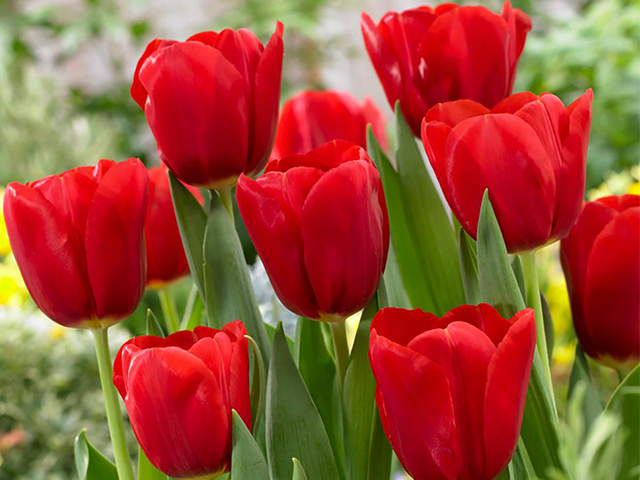

Neural Network's Prediction Result:  Tulip
Neural Network's Accuracy:  0.9097222222222222


SVM's Prediction Result::  Tulip
SVM's Accuracy:  0.8645833333333334


Random Forest's Prediction Result:  Tulip
Random Forest's Accuracy:  0.8657407407407407


KNN's Prediction Result:  Tulip
KNN's Accuracy:  0.8368055555555556


Linear Regression's Prediction Result:  Tulip
Linear Regression's Accuracy:  0.8680555555555556


Decision Tree's Prediction Result:  Tulip
Decision Tree's Accuracy:  0.6759259259259259


In [70]:
from sklearn.metrics import accuracy_score

#Hiển thị input_image
from IPython.display import display, Image
display(Image(filename=input))


y_pred1 = np.argmax(NR_model.predict(transform_pic(input)), axis=-1)
print("Neural Network's Prediction Result: ", name_flower(y_pred1))
# print accuracy score neural network
y_pred = np.argmax(NR_model.predict(X_test), axis=-1)
print("Neural Network's Accuracy: ", accuracy_score(y_pred, Y_test)) 
print("\n")

y_pred2 = svm_model.predict(transform_pic(input))
print("SVM's Prediction Result:: ", name_flower(y_pred2))
# print accuracy score SVM
print("SVM's Accuracy: ", svm_model.score(X_test,Y_test))
print("\n")

y_pred3 = RF_model.predict(transform_pic(input))
print("Random Forest's Prediction Result: ", name_flower(y_pred3))
# print accuracy score random forest
print("Random Forest's Accuracy: ", RF_model.score(X_test,Y_test))
print("\n")

y_pred4 = KNN_model.predict(transform_pic(input))
print("KNN's Prediction Result: ", name_flower(y_pred4))
# print accuracy score knn
print("KNN's Accuracy: ", KNN_model.score(X_test,Y_test))
print("\n")

y_pred5 = LR_model.predict(transform_pic(input))
print("Linear Regression's Prediction Result: ", name_flower(y_pred5))
# print accuracy score linear regression
print("Linear Regression's Accuracy: ", LR_model.score(X_test,Y_test))
print("\n")

y_pred6 = decisiontree_model.predict(transform_pic(input))
print("Decision Tree's Prediction Result: ", name_flower(y_pred6))
# print accuracy score decision tree
print("Decision Tree's Accuracy: ", decisiontree_model.score(X_test,Y_test))